# Random Forest
**Random forest is a supervised learning algorithm what builds multiple decision trees and merges them together to get a more accurate and stable prediction. It is also one of the most used algorithms, because of its simplicity and diversity (it can be used for both classification and regression tasks).**
![Random Forest](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)
*Image from [wikipedia](https://en.wikipedia.org/wiki/Random_forest)*

## 1 Decision Tree vs Random Forest

### 1.1 Load and split dataset into random train and test subsets

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

breast_cancer = load_breast_cancer()
print(breast_cancer.DESCR)
X, y = breast_cancer.data, breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 1.2 Train and prune a decision tree
We my use <font color = blue>ccp_alpha</font> to prune a tree to avoid over-fitting after training, in order to create a decision tree that generalizes better.To get an idea of what values of <font color = blue>ccp_alpha</font> could be appropriate, scikit-learn provides [DecisionTreeClassifier.cost_complexity_pruning_path](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.cost_complexity_pruning_path) that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

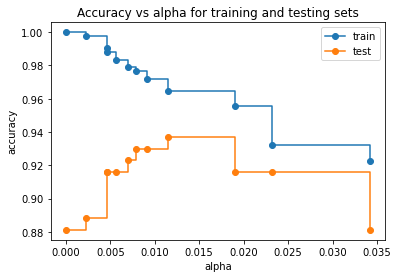

The best ccp_alpha is 0.015, training accuracy: 0.965, testing accuracy: 0.937


In [2]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

decisionTree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.015)
decisionTree.fit(X_train, y_train)
print("The best ccp_alpha is 0.015, training accuracy: %.3f, testing accuracy: %.3f" % (
    decisionTree.score(X_train, y_train), decisionTree.score(X_test, y_test)))

### 1.3 Compare with RandomForestClassifier
The [sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method.

In [3]:
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=10, random_state=0)
randomForest = randomForest.fit(X_train, y_train)

print("RandomForestClassifier, training accuracy: %.3f, testing accuracy: %.3f" % (
    randomForest.score(X_train, y_train), randomForest.score(X_test, y_test)))

RandomForestClassifier, training accuracy: 1.000, testing accuracy: 0.951


## 2 RandomForestClassifier API[<sup>\[1\]</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
In random forests (see [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) and [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor) classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

```python
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, 
                               min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                               max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                               min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
                               random_state=None, verbose=0, warm_start=False, class_weight=None, 
                               ccp_alpha=0.0, max_samples=None)
```
Parameters:
- <font color = blue>**n_estimators**</font>: int, default=100
    The number of trees in the forest.


- criterion:{"gini", "entropy"},default="gini"
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.


- max_depth: int, default=None 
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


- min_samples_split: int or float, default=2
    The minimum number of samples required to split an internal node:
    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split.


- min_samples_leaf: int or float, default=1
    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least `min_samples_leaf` training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node.


- min_weight_fraction_leaf: float, default=0.0 
    The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
   

- <font color = blue>**max_features**</font>: {“auto”, “sqrt”, “log2”}, int or float, default=”auto”
    The number of features to consider when looking for the best split:
    - If int, then consider `max_features` features at each split.
    - If float, then `max_features` is a fraction and int(max_features * n_features) features are considered at each split.
    - If “auto”, then `max_features=sqrt(n_features)`.
    - If “sqrt”, then `max_features=sqrt(n_features)` (same as “auto”).
    - If “log2”, then `max_features=log2(n_features)`.
    - If None, then `max_features=n_features`.


- random_state: int, RandomState instance, default=None
    Controls both the randomness of the bootstrapping of the samples used when building trees (if `bootstrap=True`) and the sampling of the features to consider when looking for the best split at each node (if `max_features < n_features`).
   
   
- max_leaf_nodes: int, default=None
    Grow a tree with `max_leaf_nodes` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
    

- min_impurity_decrease: float, default=0.0
    A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
    
    
- min_impurity_split: float, default=0
    Use min_impurity_decrease instead.


- bootstrapbool: bool, default=True
    Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.


- <font color = blue>**oob_score**</font>: bool, default=False
    Whether to use out-of-bag samples to estimate the generalization accuracy.


- n_jobs: int, default=None
    The number of jobs to run in parallel.


- verbose: int, default=0
    Controls the verbosity when fitting and predicting.


- warm_start: bool, default=False
    When set to `True`, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.


- class_weight: {“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
    Weights associated with classes in the form `{class_label: weight}`. If not given, all classes are supposed to have weight one. 


- ccp_alpha: non-negative float, default=0.0
    Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.


- max_samples: int or float, default=None
    If bootstrap is True, the number of samples to draw from X to train each base estimator.
    - If None (default), then draw `X.shape[0]` samples.
    - If int, then draw `max_samples` samples.
    - If float, then draw `max_samples * X.shape[0]` samples. Thus, `max_samples` should be in the interval `(0, 1)`.


return:


### 2.1 Random Trees in Random Forest

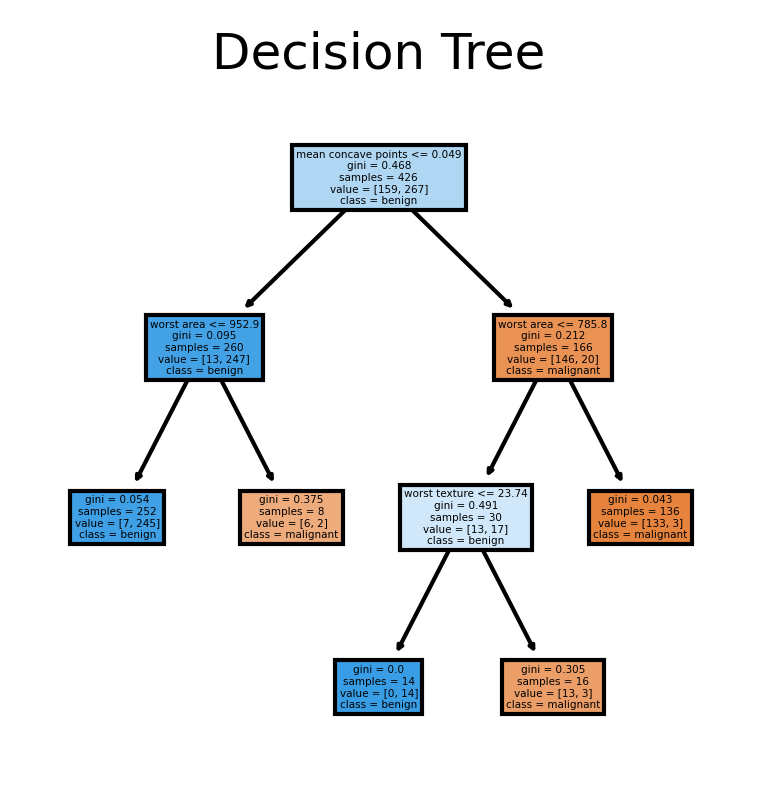

<Figure size 432x288 with 0 Axes>

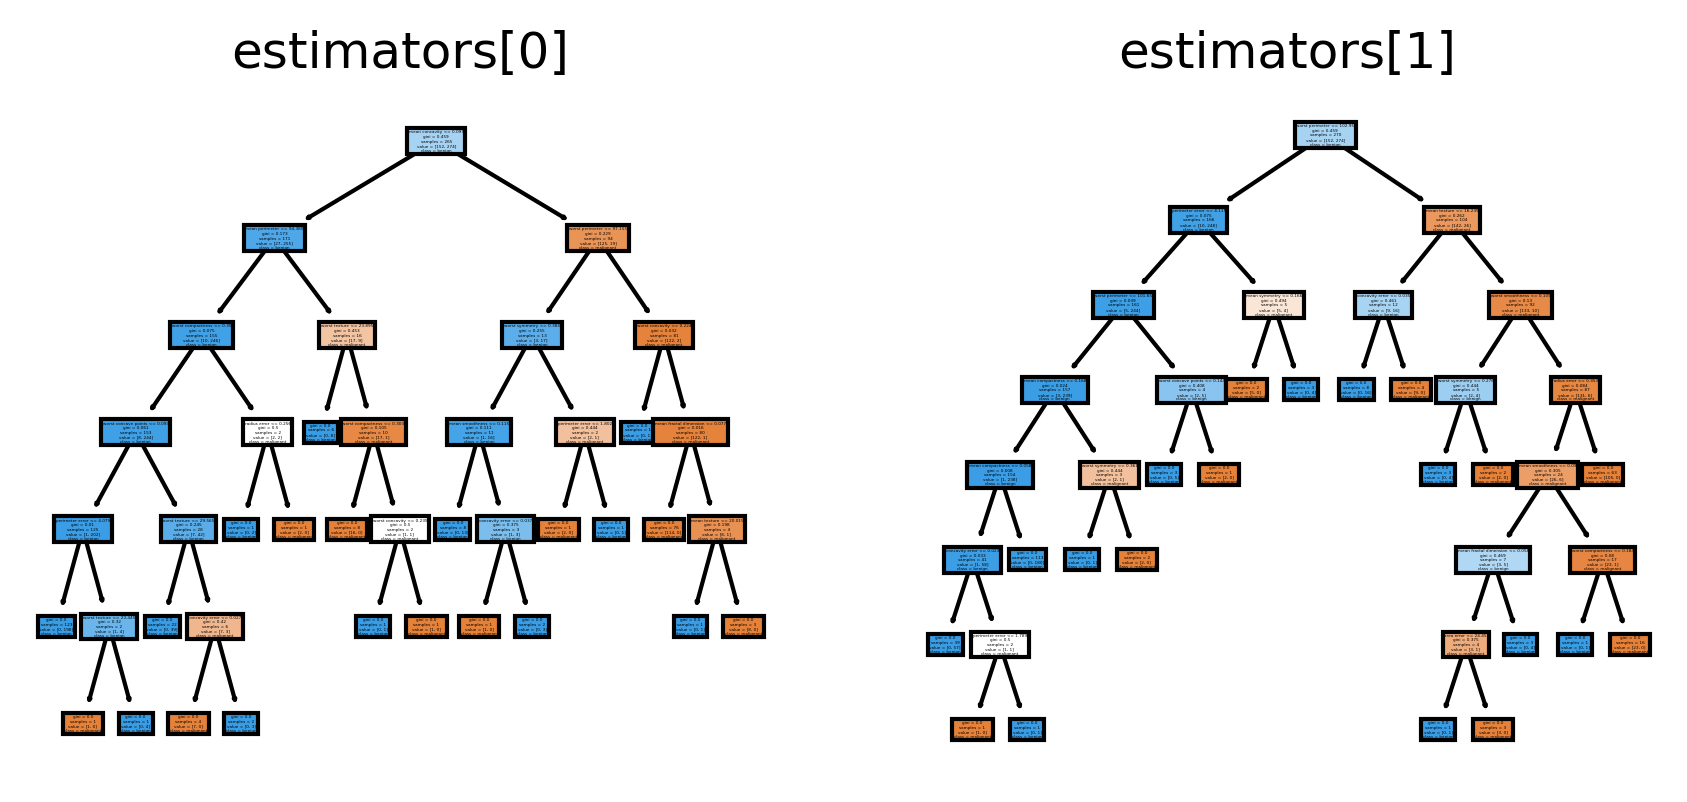

In [7]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (3,3), dpi = 300)
tree.plot_tree(decisionTree, feature_names = breast_cancer.feature_names, class_names=breast_cancer.target_names, filled = True);
plt.title("Decision Tree")

plt.figure()
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3), dpi = 300)
plt.title("Random Forest")
# estimators_: list of DecisionTreeClassifier. The collection of fitted sub-estimators.
estimators = randomForest.estimators_
tree.plot_tree(estimators[0], feature_names = breast_cancer.feature_names, class_names=breast_cancer.target_names, filled = True, ax=axes[0]);
axes[0].set_title("estimators[0]")
tree.plot_tree(estimators[1], feature_names = breast_cancer.feature_names, class_names=breast_cancer.target_names, filled = True, ax=axes[1]);
axes[1].set_title("estimators[1]")
plt.show()

## 3 Parameter tuning[<sup>\[2\]</sup>](https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters)
The main parameters to adjust when using these methods are <font color = blue>n_estimators</font> and <font color = blue>max_features</font>. The former is the number of trees in the forest. The larger the better, but also the longer it will take to compute. In addition, note that results will stop getting significantly better beyond a critical number of trees. The latter is the size of the random subsets of features to consider when splitting a node. The lower the greater the reduction of variance, but also the greater the increase in bias. Empirical good default values are **<font color = red>max_features=None</font> (always considering all features instead of a random subset) for <font color = red>regression</font> problems**, and **<font color = green>max_features="sqrt"</font> (using a random subset of size sqrt(n_features)) for <font color = green>classification</font> tasks (where n_features is the number of features in the data)**.

### 3.1 Adjust the number of trees in the forest

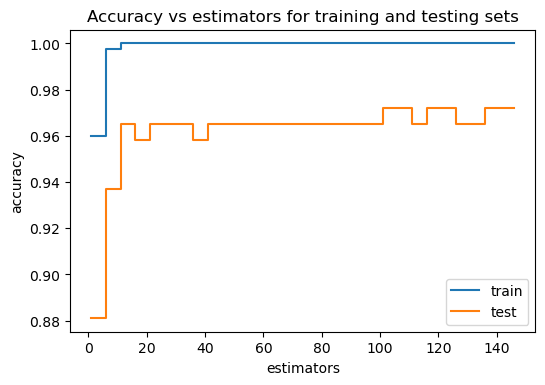

In [8]:
import matplotlib.pyplot as plt

# Range of `n_estimators` values to explore.
min_estimators = 1
max_estimators = 150
train_scores = []
test_scores = []

randomForest = RandomForestClassifier(n_estimators=1, random_state=0)
for i in range(min_estimators, max_estimators + 1, 5):
        randomForest.set_params(n_estimators=i)
        randomForest.fit(X_train, y_train)
        train_scores.append(randomForest.score(X_train, y_train))
        test_scores.append(randomForest.score(X_test, y_test))

fig, ax = plt.subplots(dpi = 100)
ax.set_xlabel("estimators")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs estimators for training and testing sets")
ax.plot(range(min_estimators, max_estimators + 1, 5), train_scores, label="train",
        drawstyle="steps-post")
ax.plot(range(min_estimators, max_estimators + 1, 5), test_scores, label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
## 3.2 OOB Errors for Random Forests[<sup>\[3\]</sup>](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html)
The RandomForestClassifier is trained using bootstrap aggregation, where each new tree is fit from a bootstrap sample of the training observations \\(z_i = (x_i, y_i)\\). The out-of-bag (OOB) error is the average error for each \\(z_i\\) calculated using predictions from the trees that do not contain  in their respective bootstrap sample. This allows the RandomForestClassifier to be fit and validated whilst being trained.

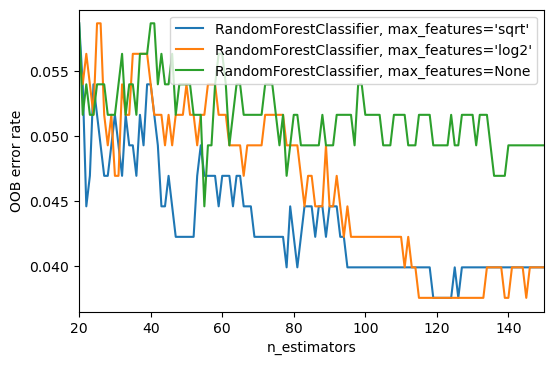

In [9]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123


# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 20
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

plt.figure(dpi=100)
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

# 4 Practice
This is a wine classification task. Please adjust the parameters for better performance.

In [5]:
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt", random_state=0)
clf = clf.fit(X_train, y_train)

print("Training accuracy: %.3f, testing accuracy: %.3f" % (
    clf.score(X_train, y_train), clf.score(X_test, y_test)))

Training accuracy: 1.000, testing accuracy: 0.978


## References

[1] https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
[2] https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters  
[3] https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html